<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/14_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install whit_phys_util 1> /dev/null

In [51]:
import whit_phys_util as buc
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [101]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


In [52]:
var('b R zeta');
params = {zeta:0.5, R:1}

In [64]:
theta = 2*(asin(b/R) - asin(zeta*b/R))
dtheta_db = diff(theta,b)
dxs_inv = (sin(theta)/b)*dtheta_db
dxs = 1/dxs_inv 
dxs #Differential cross section

b/((-2*zeta/(R*sqrt(1 - b**2*zeta**2/R**2)) + 2/(R*sqrt(1 - b**2/R**2)))*sin(2*asin(b/R) - 2*asin(b*zeta/R)))

In [98]:
dxs_n = lambdify(b,dxs.subs(params),'numpy')
theta_n = lambdify(b,theta.subs(params),'numpy')
b_n = np.linspace(1e-10,0.9999999999,1001)

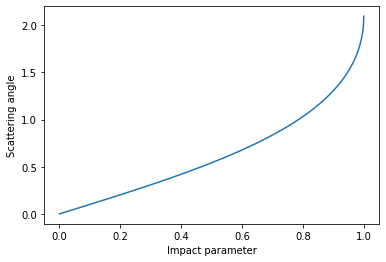

In [104]:
fig1,ax1 = plt.subplots()
ax1.plot(b_n,theta_n(b_n))
ax1.set_ylabel('Scattering angle')
ax1.set_xlabel('Impact parameter'); #impact parameter as a ratio of R.

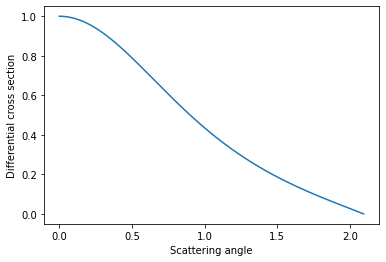

In [102]:
fig2,ax2 = plt.subplots()
ax2.plot(theta_n(b_n),dxs_n(b_n))
ax2.set_xlabel('Scattering angle')
ax2.set_ylabel('Differential cross section');

Comment 
> The differential cross section is at a max at $\theta = 0$, and a min at $\frac{b}{R} = 1$, or $\theta = 2$. This means that as the impact parameter decreases, the differential cross section increases. Notice as $\theta$ goes to $2$, the differential cross section goes to zero, as in this case $\frac{b}{R} = 1$, and the incident particle is no longer going to be affected by the impulses because it will miss the potential well. At the boundary in this case where $b$ is slightly smaller than $R$, the impulses will be almost perpendicular to the initial momentum, reulting in a maximum in the scattering angle. In the case of $b = 0$, the impulses will not change the direction of the incident particle, just its energy, and there will be no scattering angle. 